##### SUBJECT TO
- A-1 変数x x[d, k1, k2]の合計は 1 以下
  - m += lpSum([x[d, k2, k1] for k2 in K]) <= 1
    - _C1: x_(1,_'p',_'p') + x_(1,_'s1',_'p') + x_(1,_'s2',_'p') + x_(1,_'s3',_'p') + x_(1,_'s4',_'p') <= 1
    - _C2: x_(1,_'p',_'s1') + x_(1,_'s1',_'s1') + x_(1,_'s2',_'s1') + x_(1,_'s3',_'s1') + x_(1,_'s4',_'s1') <= 1
- A-2 変数x x[d, k1, k2]の合計 と (x[d, k2, k1])の合計は同じ
  - m += lpSum([x[d, k1, k2] for k2 in K]) == lpSum([x[d, k1, k2] for k2 in K])
    - _C1: 0 x_(1,_'p',_'p') + 0 x_(1,_'p',_'s1') + 0 x_(1,_'p',_'s2') + 0 x_(1,_'p',_'s3') + 0 x_(1,_'p',_'s4') = 0
    - _C2: 0 x_(1,_'s1',_'p') + 0 x_(1,_'s1',_'s1') + 0 x_(1,_'s1',_'s2') + 0 x_(1,_'s1',_'s3') + 0 x_(1,_'s1',_'s4') = 0
- B-1 変数u(順番)は、地点Pはゼロをとる
  - m += u[d, 'p'] == 0
    - _C1: u_(1,_'p') = 0
    - _C2: u_(2,_'p') = 0
- B-2 変数u(順番)は、1から地点数以下の値をとる
  - m += u[d, s] >= 1
  - m += u[d, s] <= len(S)
    - _C1: u_(1,_'s1') >= 1
    - _C2: u_(1,_'s1') <= 4
    - _C3: u_(1,_'s2') >= 1
    - _C4: u_(1,_'s2') <= 4
- B-3 変数u(順番)は、変数x=0で必ず成立し、変数x=1 で s1 < s2 の順番をとる
  - m += u[d, s1] + 1 <= u[d, s2] + (len(K)-1) * (1-x[d, s1, s2])
    - _C1: 0 u_(1,_'s1') + 4 x_(1,_'s1',_'s1') <= 3 (※ u_(1,_'p') == 0)
    - _C2: u_(1,_'s1') - u_(1,_'s2') + 4 x_(1,_'s1',_'s2') <= 3
    - _C3: u_(1,_'s1') - u_(1,_'s3') + 4 x_(1,_'s1',_'s3') <= 3
- C-1 変数y(荷物)は期間内で1回
  - m += lpSum([y[d, r] for d in D]) <= 1
    - _C1: y_(1,_'r1') + y_(2,_'r1') + y_(3,_'r1') + y_(4,_'r1') <= 1
    - _C2: y_(1,_'r2') + y_(2,_'r2') + y_(3,_'r2') + y_(4,_'r2') <= 1
- D-1 期間内で配送先に訪問する
  - m += y[d, r] <= lpSum([x[d, k, tar_s] for k in K])
    - _C1: - x_(1,_'p',_'s1') - x_(1,_'s1',_'s1') - x_(1,_'s2',_'s1') - x_(1,_'s3',_'s1') - x_(1,_'s4',_'s1') + y_(1,_'r1') <= 0
    - _C2: - x_(1,_'p',_'s2') - x_(1,_'s1',_'s2') - x_(1,_'s2',_'s2') - x_(1,_'s3',_'s2') - x_(1,_'s4',_'s2') + y_(1,_'r2') <= 0
- E-1 最大重量4000以下
  - m += lpSum([y[d, r] * R2SWBE[r][1] for r in R]) <= MAX_WEIGHT
    - _C1: 1000 y_(1,_'r1') + 1000 y_(1,_'r2') + 1000 y_(1,_'r3') + 1500 y_(1,_'r4') + 1500 y_(1,_'r5') + 1500 y_(1,_'r6') + 1500 y_(1,_'r7') + 3000 y_(1,_'r8') <= 4000
    - _C2: 1000 y_(2,_'r1') + 1000 y_(2,_'r2') + 1000 y_(2,_'r3') + 1500 y_(2,_'r4') + 1500 y_(2,_'r5') + 1500 y_(2,_'r6') + 1500 y_(2,_'r7') + 3000 y_(2,_'r8') <= 4000
- F-1 最大労働時間は8時間以下
  - m += lpSum([KK2T[k1, k2] * x[d, k1, k2] for k1 in K for k2 in K]) - MAX_OFFICE_HOURS <= h[d]
    - _C1: - h_1 + 2 x_(1,_'p',_'s1') + 2.82 x_(1,_'p',_'s2') + … + 6.32 x_(1,_'s4',_'s1') + 7.21 x_(1,_'s4',_'s2') + 2 x_(1,_'s4',_'s3') <= 8
    - _C2: - h_2 + 2 x_(2,_'p',_'s1') + 2.82 x_(2,_'p',_'s2') + … + 6.32 x_(2,_'s4',_'s1') + 7.21 x_(2,_'s4',_'s2') + 2 x_(2,_'s4',_'s3') <= 8
- G-1 残業/日 は3時間以内
  - m += h[d] <= OVER_WORK_HOURS
    - _C1: h_1 <= 3
    - _C2: h_2 <= 3
- H-1 指定日以前は禁止
- H-2 指定日以後は禁止
  - m += y[d, r] == 0
  - m += y[d, r] == 0
    - _C1: y_(2,_'r1') = 0
    - _C2: y_(3,_'r1') = 0
- 残業費用の最小化
  - zangyo_costs = lpSum([OVER_WORK_UNIT_PRICE * h[d] for d in D])
  - outsourse_costs = lpSum(OUTSOURSING_WEIGHT * R2SWBE[r][1] * (1 - lpSum([y[d, r] for d in D])) for r in R)
  - m += zangyo_costs + outsourse_costs
    - 3000*h_1 + 3000*h_2 + 3000*h_3 + 3000*h_4 + … + -69000*y_(4,_'r7') + -138000*y_(4,_'r8') + 552000

In [49]:
from pulp import LpProblem, LpVariable, LpMaximize, LpMinimize, LpStatus, lpSum, value, LpConstraint
from pulp import PULP_CBC_CMD
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns
from  itertools import product
import math
import time
import os

In [50]:
# Read files
files = glob('../*/*routing_ver2/*.csv')
# print(files)
dfs, name_df = [], []
for i, file in enumerate(files):
    df_name = os.path.splitext(os.path.basename(files[i]))[0]
    name_df.append(df_name)
    df = pd.read_csv(files[i])
    dfs.append(df)
print(name_df)

['distances', 'locations', 'orders', 'small_distances', 'small_locations', 'small_orders']


In [51]:
for df in dfs[3:]:
    print(df.shape)
    display(df.head(3))

(25, 3)


,k1,k2,t
0,p,p,0.000000
1,p,s1,2.000000
2,p,s2,2.828427


(5, 4)


,k,x,y,depo_flag
0,p,0,0,1
1,s1,-2,0,0
2,s2,-2,-2,0


(8, 5)


,r,s,w,b,e
0,r1,s1,1000,1,1
1,r2,s2,1000,1,2
2,r3,s3,1000,2,2


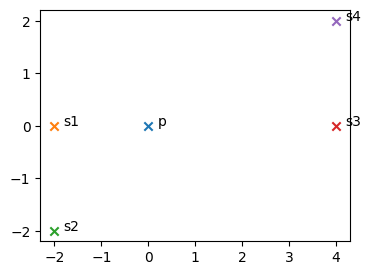

In [52]:
fig = plt.figure(figsize=(4, 3))
for r in dfs[4].itertuples():
    plt.scatter(r.x, r.y, marker='x')
    plt.annotate(r.k, (r.x+0.2, r.y))

In [53]:
kk_df = dfs[3].copy()
k_df = dfs[4].copy()
r_df = dfs[5].copy()

D = list(range(r_df['b'].min(), r_df['e'].max()+1))
P = k_df['k'][k_df['depo_flag'] == 1]
S = k_df['k'][k_df['depo_flag'] == 0]
K = k_df['k']
R = r_df['r']

In [54]:
DKK = [(d, k1, k2) for d in D for k1 in K for k2 in K]
DR = [(d, r) for d in D for r in R]
DK = [(d, k) for d in D for k in K]
print(len(DKK))
print(len(DR))
print(len(DK))
# D

100
32
20


In [55]:
R2SWBE = {r.r: (r.s, r.w, r.b, r.e) for r in r_df.itertuples()}
KK2T = {(r.k1, r.k2): r.t for r in kk_df.itertuples()}
print(len(R2SWBE))
print(len(KK2T))
# KK2T

8
25


In [56]:
x = LpVariable.dicts('x', DKK, cat='Binary')
u = LpVariable.dicts('u', DK, cat='Interger')
u = LpVariable.dicts('u', DK)
y = LpVariable.dicts('y', DR, cat='Binary')
h = LpVariable.dicts('h', D, cat='Continuous', lowBound=0)

In [62]:
m = LpProblem(name='vrp_small', sense=LpMinimize)

# 残業費用の最小化
OVER_WORK_UNIT_PRICE = 3000
OUTSOURSING_WEIGHT = 46
zangyo_costs = lpSum([OVER_WORK_UNIT_PRICE * h[d] for d in D])
outsourse_costs = lpSum(OUTSOURSING_WEIGHT * R2SWBE[r][1] * (1 - lpSum([y[d, r] for d in D])) for r in R)
# m += zangyo_costs + outsourse_costs
m += outsourse_costs

# for d in D:
#     for k1 in K:
#         # A-1 変数x x[d, k1, k2]の合計は 1 以下
#         m += lpSum([x[d, k2, k1] for k2 in K]) <= 1
#         # A-2 変数x x[d, k1, k2]の合計 と (x[d, k2, k1])の合計は同じ
#         m += lpSum([x[d, k1, k2] for k2 in K]) == lpSum([x[d, k2, k1] for k2 in K])

#     # B-1 変数u(順番)は、地点Pはゼロをとる
#     m += u[d, 'p'] == 0

#     # B-2 変数u(順番)は、1から地点数以下の値をとる
#     for s in S:
#         m += u[d, s] >= 1
#         m += u[d, s] <= len(S)

#     # B-3 変数u(順番)は、変数x=0で必ず成立し、変数x=1 で s1<s2 の順番をとる
#     for s1 in S:
#         for s2 in S:
#             m += u[d, s1] + 1 <= u[d, s2] + (len(K)-1) * (1-x[d, s1, s2])

# for r in R:
#     # C-1 変数y(荷物)は期間内で1回
#     m += lpSum([y[d, r] for d in D]) <= 1

# for d in D:
#     for r in R:
#         tar_s = R2SWBE[r][0]
#         # D-1 変数y(荷物)は変数xの合計より小さくなる
#         m += y[d, r] <= lpSum([x[d, k, tar_s] for k in K])

# MAX_WEIGHT = 4000
# for d in D:
#     # E-1 最大重量4000以下
#     m += lpSum([y[d, r] * R2SWBE[r][1] for r in R]) <= MAX_WEIGHT

# MAX_OFFICE_HOURS = 8
# for d in D:
#     # F-1 最大労働時間は8時間以下
#     m += lpSum([KK2T[k1, k2] * x[d, k1, k2] for k1 in K for k2 in K]) - MAX_OFFICE_HOURS <= h[d]

# OVERWORK_HOURS = 3
# for d in D:
#     # 残業/日 は3時間以内
#     m += h[d] <= OVERWORK_HOURS

# for r in R:
#     for d in D:
#         if d < R2SWBE[r][2]:
#             # H-1 指定日以前は禁止
#             m += y[d, r] == 0
#         if R2SWBE[r][3] < d:
#             # H-1 指定日以後は禁止
#             m += y[d, r] == 0

m

vrp_small:
MINIMIZE
-46000*y_(1,_'r1') + -46000*y_(1,_'r2') + -46000*y_(1,_'r3') + -69000*y_(1,_'r4') + -69000*y_(1,_'r5') + -69000*y_(1,_'r6') + -69000*y_(1,_'r7') + -138000*y_(1,_'r8') + -46000*y_(2,_'r1') + -46000*y_(2,_'r2') + -46000*y_(2,_'r3') + -69000*y_(2,_'r4') + -69000*y_(2,_'r5') + -69000*y_(2,_'r6') + -69000*y_(2,_'r7') + -138000*y_(2,_'r8') + -46000*y_(3,_'r1') + -46000*y_(3,_'r2') + -46000*y_(3,_'r3') + -69000*y_(3,_'r4') + -69000*y_(3,_'r5') + -69000*y_(3,_'r6') + -69000*y_(3,_'r7') + -138000*y_(3,_'r8') + -46000*y_(4,_'r1') + -46000*y_(4,_'r2') + -46000*y_(4,_'r3') + -69000*y_(4,_'r4') + -69000*y_(4,_'r5') + -69000*y_(4,_'r6') + -69000*y_(4,_'r7') + -138000*y_(4,_'r8') + 552000
VARIABLES
0 <= y_(1,_'r1') <= 1 Integer
0 <= y_(1,_'r2') <= 1 Integer
0 <= y_(1,_'r3') <= 1 Integer
0 <= y_(1,_'r4') <= 1 Integer
0 <= y_(1,_'r5') <= 1 Integer
0 <= y_(1,_'r6') <= 1 Integer
0 <= y_(1,_'r7') <= 1 Integer
0 <= y_(1,_'r8') <= 1 Integer
0 <= y_(2,_'r1') <= 1 Integer
0 <= y_(2,_'r2') 

In [58]:
solver = PULP_CBC_CMD()
status = m.solve(solver=solver)

In [14]:
print(f'Status : {LpStatus[status]}')
# Result
length = 25
print(f'Overtime Cost :'.ljust(length), f'\{zangyo_costs.value():,}')
print(f'Outsourcing Cost :'.ljust(length), f'\{outsourse_costs.value():,}')
print(f'Total Cost: '.ljust(length), f'\{zangyo_costs.value() + outsourse_costs.value():,}')

Status : Optimal
Overtime Cost :           \10,249.22373
Outsourcing Cost :        \69,000.0
Total Cost:               \79,249.22373


In [27]:
for (d, k1, k2) in DKK:
    if x[d, k1, k2].value() == 1 and d == d:
        print(x[d, k1, k2], end=', ')

x_(1,_'p',_'s1'), x_(1,_'s1',_'s2'), x_(1,_'s2',_'p'), x_(2,_'p',_'s3'), x_(2,_'s3',_'s4'), x_(2,_'s4',_'p'), x_(3,_'p',_'s1'), x_(3,_'s1',_'s2'), x_(3,_'s2',_'p'), x_(4,_'p',_'s4'), x_(4,_'s4',_'p'), 

In [26]:
for (d, k) in DK:
    if u[d, k].value() == 1:
        print(u[d, k], end=', ')

u_(1,_'s1'), u_(1,_'s3'), u_(1,_'s4'), u_(2,_'s1'), u_(2,_'s2'), u_(2,_'s3'), u_(3,_'s1'), u_(3,_'s3'), u_(3,_'s4'), u_(4,_'s1'), u_(4,_'s2'), u_(4,_'s3'), u_(4,_'s4'), 

In [28]:
for (d, r) in DR:
    if y[d, r].value() == 1:
        print(y[d, r], end=', ')

y_(1,_'r1'), y_(1,_'r2'), y_(2,_'r3'), y_(2,_'r4'), y_(3,_'r5'), y_(3,_'r6'), y_(4,_'r8'), 

In [31]:
for d in D:
    print(f'{h[d].value():.02f}', end=', ')

0.00, 2.47, 0.00, 0.94, 

In [17]:
for d in D:
    X = [(k1, k2) for k1 in K for k2 in K if x[d, k1, k2].value() == 1]
    time = sum([KK2T[k1, k2] for k1, k2 in X])
    weight = sum([y[d, r].value() * R2SWBE[r][1] for r in R])
    overwork = h[d].value()
    print(f'Day {d}', f'Route: {X}', f'Weight: {weight} [Kg]', f'Time: {time:.01f} [H]', f'Overwork: {overwork:.01f}')

Day 1 Route: [('p', 's1'), ('s1', 's2'), ('s2', 'p')] Weight: 2000.0 [Kg] Time: 6.8 [H] Overwork: 0.0
Day 2 Route: [('p', 's3'), ('s3', 's4'), ('s4', 'p')] Weight: 2500.0 [Kg] Time: 10.5 [H] Overwork: 2.5
Day 3 Route: [('p', 's1'), ('s1', 's2'), ('s2', 'p')] Weight: 3000.0 [Kg] Time: 6.8 [H] Overwork: 0.0
Day 4 Route: [('p', 's4'), ('s4', 'p')] Weight: 3000.0 [Kg] Time: 8.9 [H] Overwork: 0.9


In [48]:
for r in R:
    owned_flag =sum([y[d, r].value() for d in D])
    if owned_flag:
        tar_d = [d for d in D if y[d, r].value() == 1][0]
        print(f'荷物: {r}', f'Day: {tar_d}', f'Shop: {R2SWBE[r][0]}', f'Weight: {R2SWBE[r][1]:,} [Kg]')
    else:
        outsourse_costs = OUTSOURSING_WEIGHT * R2SWBE[r][1]
        print(f'荷物: {r}', f'Day: {tar_d}', f'Outsourse costs: {outsourse_costs:,} [YEN]')

荷物: r1 Day: 1 Shop: s1 Weight: 1,000 [Kg]
荷物: r2 Day: 1 Shop: s2 Weight: 1,000 [Kg]
荷物: r3 Day: 2 Shop: s3 Weight: 1,000 [Kg]
荷物: r4 Day: 2 Shop: s4 Weight: 1,500 [Kg]
荷物: r5 Day: 3 Shop: s1 Weight: 1,500 [Kg]
荷物: r6 Day: 3 Shop: s2 Weight: 1,500 [Kg]
荷物: r7 Day: 3 Outsourse costs: 69,000 [YEN]
荷物: r8 Day: 4 Shop: s4 Weight: 3,000 [Kg]
